In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from HMC_new import HMC

2022-02-28 10:12:15.966659: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


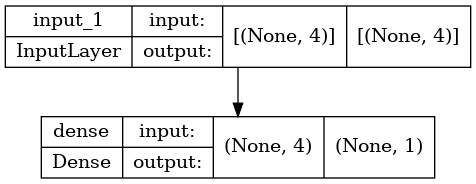

In [2]:
model = keras.Sequential([
    keras.Input(shape=(4,)),
    #keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(optimizer="adam",
             loss=keras.losses.MeanSquaredError())
keras.utils.plot_model(model, show_shapes=True, to_file="../etc/test.png")

In [3]:
t = np.linspace(0.01, 3.14, 50)
x = np.stack([
    np.sin(t),
    np.cos(t),
    t ** 2,
    np.log(t)
]).T + 0.1 * np.random.randn(50, 4)
print(x.shape)
y = np.expand_dims(t, axis=1)

(50, 4)


In [4]:
model.fit(x, y, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 1.6624
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 1.6287
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 1.5978
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 1.5664
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 1.5342
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 1.5030
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 1.4719
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 1.4418
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 1.4124
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 1.3840
Epoch 11/100
2/2 [==============================] - 0s 2ms/step - loss: 1.3541
Epoch 12/100
2/2 [==============================] - 0s 2ms/step - loss: 1.3266
Epoch 13/100
2/2 [==============================] - 0s 2ms/st

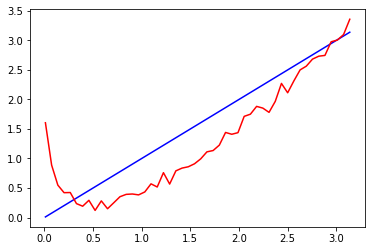

In [5]:
fig = plt.figure()
plt.plot(t, y, 'b-')
plt.plot(t, model(x), 'r-')
plt.show()

In [6]:
print(model.trainable_variables)
hmc = HMC(model, 10, 1e-3, 50)
hmc((x,y))

[<tf.Variable 'dense/kernel:0' shape=(4, 1) dtype=float32, numpy=
array([[ 0.24311268],
       [-0.41739643],
       [ 0.31697705],
       [-0.40910703]], dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.14993745], dtype=float32)>]


InvalidArgumentError: Exception encountered when calling layer "hmc" (type HMC).

cannot compute Mul as input #1(zero-based) was expected to be a int32 tensor but is a float tensor [Op:Mul]

Call arguments received:
  • inputs=('tf.Tensor(shape=(50, 4), dtype=float32)', 'tf.Tensor(shape=(50, 1), dtype=float32)')